In [2]:
# imports
import os
import math
%matplotlib inline
import matplotlib.pyplot as plt

from pylab import *
from IPython.display import display,HTML

# pyAgrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

## alternatief 1: mapping TNO python code naar BIFXML

BIFXML is een "interchange format" voor Bayes netwerken en kent ook support voor influence diagrammen. Een BIFXMl file kan worden ingelezen met pyAgrum. (https://www.cs.cmu.edu/afs/cs/user/fgcozman/www/Research/InterchangeFormat/)

onderdelen van BIFXML:
- variabelen van type "natural"(kansnodes), "decision", "utility" 
- arcs tussen de variabelen

onderdelen van een fan in de TNO code
- een "Fan" is van class type "Assembly" en bestaat uit meerdere componenten: een motor en bladen
- een "Blades" class is van type "Component" kent normaal (states) en failure gedrag (lijst failures)
- een "Fan" kent een verbinding genaamd "Axle" van type Connection class met een input en een output

idee is om de python classes te mappen op onderdelen van een BIFXML bestand:
- een Component wordt een <VARIABLE Type="natural"> node 
    - toestanden van de variabele zijn de normaal en failure status 
- een Connection kan omgezet worden in een <DEFINITION> met een van VARIABLE en een naar VARIABLE+ CPT

#### Influence diagram met pyagrum obv BIFXML
Om nu te komen tot een ID ipv een bayesiaans netwerk heb ik het volgende gedaan:
- idee is de beslissingen en utility over te nemen uit de studie van Joep Beurskens
    - een systeem kan bestaan uit honderden componenten, elke component kan gerepareerd moeten worden
    - een utility functie bepaald de grenswaarden voor vervanging, de U is afhankelijk van de "health" en het vervangingsbesluit en berekend een uitkomst obv a. vervangingskosten, b. de kosten van niet terechte vervanging en c. failure to repair
    - het vervangingsbesluit is wel of niet doen maar kent onzekerheid
    - de onzekerheid kan worden opgelost met een test, de testuitkomsten zijn de waarden van de test variabele
    - het testbesluit is om het wel of niet te doen, dit is afhankelijk van een utility die de kosten van de test meeneemt
    - het vervangingsbesluit is afhankelijk van de uitkomst van de test 


#### code inlezen met de hand gemaakt BIFXML bestand

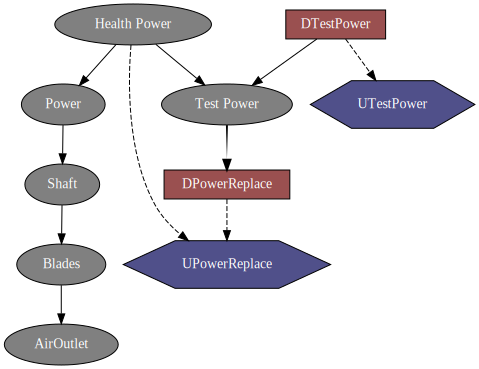

In [3]:
# creer influence diagram, laad BIFXML bestand en toon diagram
diag = gum.InfluenceDiagram()
diag.loadBIFXML('fan2.xml') # met voor 1 component de ID onderdelen voor vervangen en testen
gnb.showInfluenceDiagram(diag, size=80)

#### TODO redeneren en inference
- kosten en kansen zijn bekend dus iets wat makkelijk en snel te vervangen is kan worden vervangen
- welke component als eerste testen: degene die dichtst bij de grenswaarden zit?

In [24]:
# power is afhankelijk van Health Power 
# Health Power states zijn OK (0.99) en broken (0.01) 
# wel power gegeven health ok is hoge kans (0.995)
# geen power gegeven health ok is lage kans (0.005)
# wel power maar health broken is niet waarschijnlijk
# geen power maar health broken is wel waarschijnlijk
diag.cpt("Power")

(pyAgrum.Potential<double>@0x5566f9bf2400) 
      ||  Power            |
Health||yes      |no       |
------||---------|---------|
ok    || 0.9950  | 0.0050  |
broken|| 0.0050  | 0.9950  |

In [4]:
diag.cpt("Shaft")

(pyAgrum.Potential<double>@0x55a17e1ccb50) 
      ||  Shaft            |
Power ||yes      |no       |
------||---------|---------|
yes   || 0.6000  | 0.0000  |
no    || 0.4000  | 0.0000  |

## TODO alternatief uitbreiden bestaande code bayesnet server



## TODO alternatief Procesmodel

- proces model is abstracter dan model met componenten en hoe die samenhangen
    - processtap heeft input, verwerking en output
    - indien geen output dan mogelijk geen verwerking of geen input
    - indien geen verwerking dan model van "onderliggend proces" erbij pakken
- daardoor meer standaard bouwblokken en makkelijker code genereren
- proces van de fan
    - power on
    - draaien as
    - draaien bladen
    - resultaat lucht